# Plotting a Hertzsprung-Russel diagram using SDSS SkyServer

Write about SDSS, SkyServer, Galaxy Zoo

## Theoretical background

Stellar evolution

## Excercise 1

Explore SDSS SkyServer, try to find objects

Some nice open clusters that have photometry in **DR7**. Note, that later releases don't have photometry for crowded fields.

* http://www.galaxyzooforum.org/index.php?topic=278836.0

If stars are too bright, photometry becomes a problem so choose clusters where PSFs don't blend.

* M67
* NGC 2420
* NGC 6791

Look up clusters using the SDSS navigate tool or other sky viewer tool

* http://skyserver.sdss.org/dr14/en/tools/chart/navi.aspx
* http://aladin.u-strasbg.fr/
* http://worldwidetelescope.org/webclient/

Look up cluster data in Simbad and NED

* http://simbad.u-strasbg.fr/simbad/
* http://ned.ipac.caltech.edu/

## Excercise 2

Use CasJobs to execute queries against SkyServer: https://skyserver.sdss.org/CasJobs

* Register and use CasJobs to execute SQL queries on DR7 context.
* Understand data tables and the schema browser of SDSS SkyServer.
* Save results to MyDB, download data in various formats
* Learn how to use CasJobs client API from Python

Try to retrieve data around the coordinates of the open clusters.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
sql = """
DECLARE @ra float = 132.84223595
DECLARE @dec float = 11.80775657
DECLARE @size float = 15.0/60.0

SELECT
  objID,
  ra, dec,
  psfMag_u
FROM Star
WHERE ra BETWEEN @ra - @size AND @ra + @size AND
      dec BETWEEN @dec - @size AND @dec + @size
"""

In [31]:
stars = np.loadtxt("M67.csv", delimiter=",", skiprows=1)
stars.shape

(3803, 8)

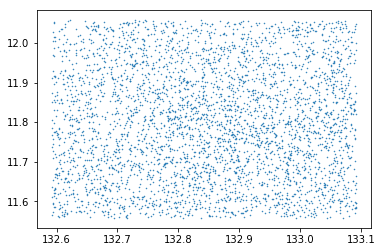

In [32]:
plot(stars[:,1], stars[:,2], ".", ms=1)

In [33]:
ra_cnts, ra_bins = histogram(stars[:,1], bins=10)
dec_cnts, dec_bins = histogram(stars[:,2], bins=10)

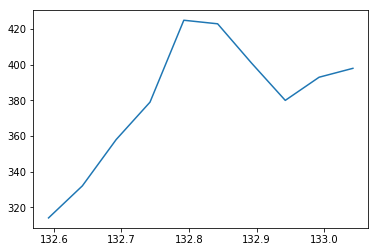

In [34]:
plot(ra_bins[:-1], ra_cnts)

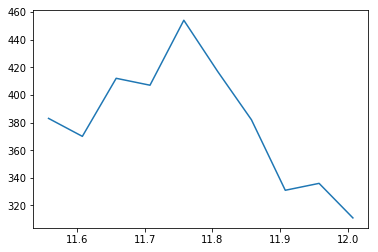

In [35]:
plot(dec_bins[:-1], dec_cnts)

## Excercise 3

Plot the color-magnitude diagram

Temperature is similar to color index (CI), the difference between two magnitudes. Stars of the cluster are at equal distance from us.

(28, 5)

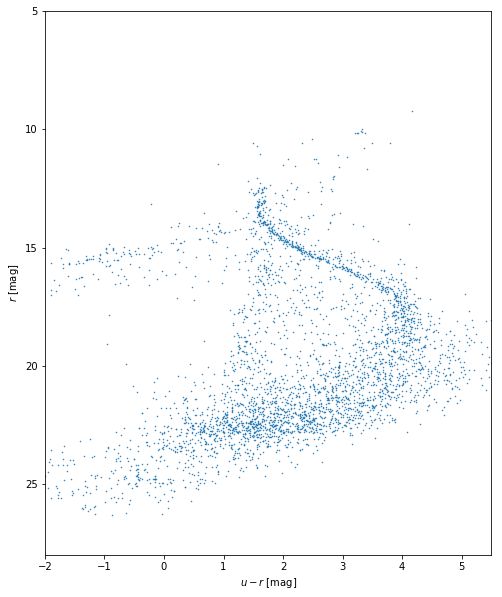

In [107]:
figsize(8, 10)
plot(stars[:,3] - stars[:,5], stars[:,5], '.', ms=1)
xlabel('$u-r$ [mag]')
ylabel('$r$ [mag]')
xlim([-2, 5.5])
ylim([28,5])

## Excercise 4

Generate a theoretical color-magnitude diagram using an on-line population synthesis code

* http://stev.oapd.inaf.it/cgi-bin/cmd

In [83]:
iso = np.loadtxt("isochrones.dat.gz")
iso.shape

# columns:
# Zini Age Mini  Mass   logL    logTe  logg  label   McoreTP C_O  period0 period1 pmode  Mloss  tau1m   X   Y   Xc  Xn  Xo  Cexcess  Z 	 mbolmag  umag    gmag    rmag    imag    zmag

(29860, 28)

In [84]:
# Age steps (in years)
np.unique(iso[:,1])

array([  3.98000000e+06,   4.47000000e+06,   5.01000000e+06,
         5.62000000e+06,   6.31000000e+06,   7.08000000e+06,
         7.94000000e+06,   8.91000000e+06,   1.00000000e+07,
         1.12000000e+07,   1.26000000e+07,   1.41000000e+07,
         1.58000000e+07,   1.78000000e+07,   2.00000000e+07,
         2.24000000e+07,   2.51000000e+07,   2.82000000e+07,
         3.16000000e+07,   3.55000000e+07,   3.98000000e+07,
         4.47000000e+07,   5.01000000e+07,   5.62000000e+07,
         6.31000000e+07,   7.08000000e+07,   7.94000000e+07,
         8.91000000e+07,   1.00000000e+08,   1.12000000e+08,
         1.26000000e+08,   1.41000000e+08,   1.58000000e+08,
         1.78000000e+08,   2.00000000e+08,   2.24000000e+08,
         2.51000000e+08,   2.82000000e+08,   3.16000000e+08,
         3.55000000e+08,   3.98000000e+08,   4.47000000e+08,
         5.01000000e+08,   5.62000000e+08,   6.31000000e+08,
         7.08000000e+08,   7.94000000e+08,   8.91000000e+08,
         1.00000000e+09,

(28, 5)

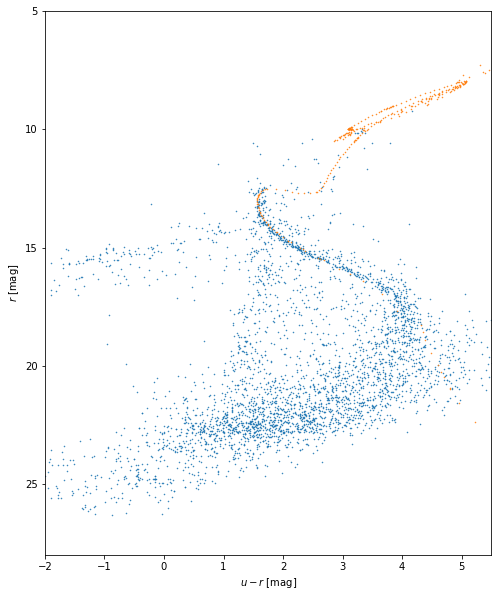

In [108]:
DM = 9.5
A = 0.1
age = 5.01000000e+09

age_cut = (iso[:,1] == age)

figsize(8, 10)
plot(stars[:,3] - stars[:,5], stars[:,5], '.', ms=1)
plot(iso[age_cut,23] - iso[age_cut,25] + A, iso[age_cut,25] + DM, '.', ms=1)
xlabel('$u-r$ [mag]')
ylabel('$r$ [mag]')
xlim([-2, 5.5])
ylim([28,5])

In [ ]:
# Literature values (from NED and Simbad)

A_lit = [0.145, 0.113, 0.078, 0.058, 0.043]
D_lit = 980 #pc
Fe_H_lit = 0.03

In [103]:
D = 10**(DM / 5) * 10 # pc
D

794.3282347242814

## Excercise 5

More precise search around the cluster center using HTM and Spherical Lib.

* Show that basic search is fast when the magnitudes are not returned
* Show that query optimized fails miserably when trying to get magnitudes back

In [ ]:
"""
DECLARE @ra float = 132.84223595
DECLARE @dec float = 11.80775657
DECLARE @size float = 15.0/60.0
  
  
SELECT   
  objID,
  ra, dec
FROM dbo.fHtmCoverCircleEq(@ra, @dec, @size) htm
INNER JOIN PhotoObjAll ON PhotoObjAll.htmID BETWEEN htm.HtmIDStart AND htm.HtmIDEnd
"""

In [ ]:
"""
DECLARE @ra float = 132.84223595
DECLARE @dec float = 11.80775657
DECLARE @size float = 15.0/60.0
  
  
SELECT   
  objID,
  ra, dec,
  psfMag_u, psfMag_g, psfMag_r, psfMag_i, psfMag_z
FROM dbo.fHtmCoverCircleEq(@ra, @dec, @size) htm
INNER JOIN PhotoObjAll ON PhotoObjAll.htmID BETWEEN htm.HtmIDStart AND htm.HtmIDEnd
"""